In [97]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, Ridge, Lasso




import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

In [98]:
training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [99]:
def plot_distribution(data, label):
    fig, axs = plt.subplots(nrows=2)

    sns.distplot(
        data[label], 
        ax=axs[0]
    )
    sns.boxplot(
        data[label],
        width=0.3, 
        ax=axs[1],
        showfliers=False,
    )

    # Align axes
    spacer = np.max(data[label]) * 0.05
    xmin = np.min(data[label]) - spacer
    xmax = np.max(data[label]) + spacer
    axs[0].set_xlim((xmin, xmax))
    axs[1].set_xlim((xmin, xmax))

    # Remove some axis text
    axs[0].xaxis.set_visible(False)
    axs[0].yaxis.set_visible(False)
    axs[1].yaxis.set_visible(False)

    # Put the two plots together
    plt.subplots_adjust(hspace=0)
    fig.suptitle("Distribution of " + label)

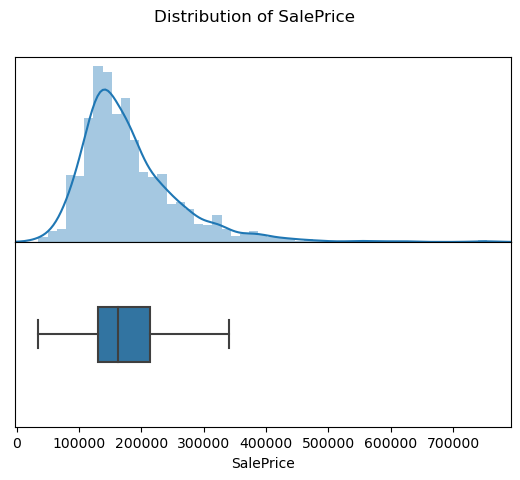

In [100]:
plot_distribution(training_data, label='SalePrice')

Text(0.5, 1.0, 'Train Correlation')

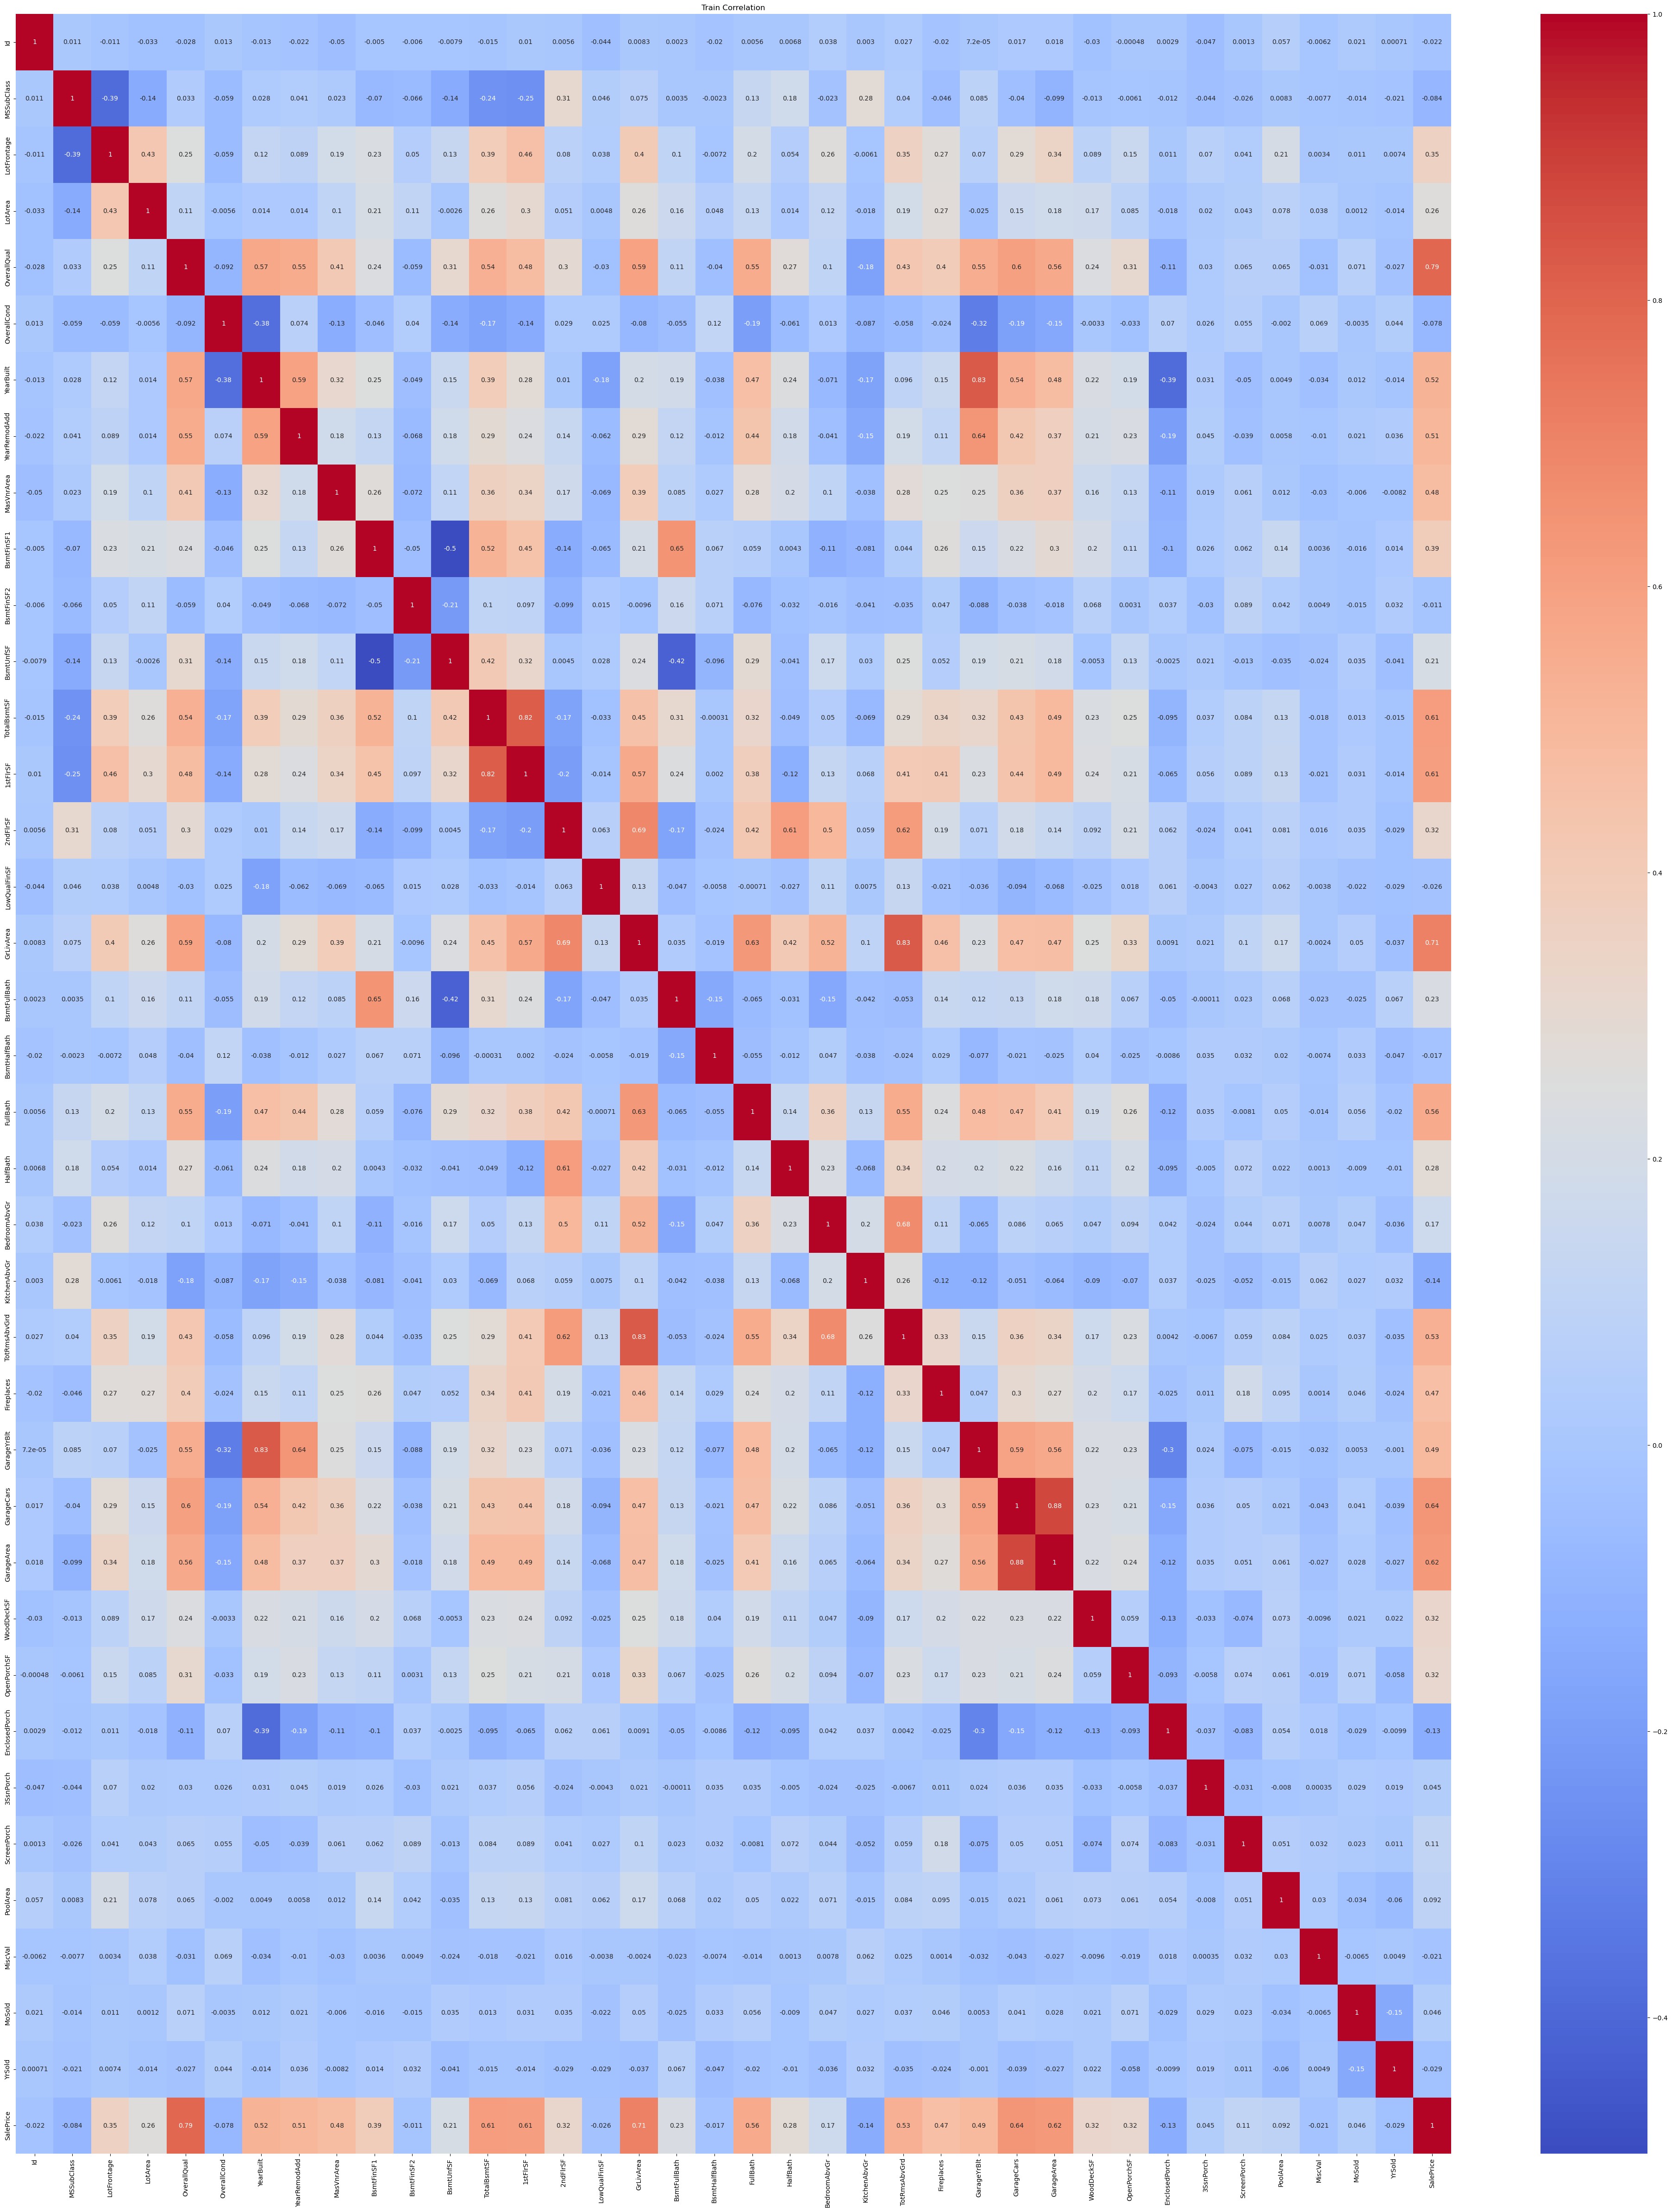

In [82]:
plt.figure(figsize=(50,60))
sns.heatmap(training_data.corr(), cmap='coolwarm', annot = True)
plt.title('Train Correlation')

Text(0.5, 1.0, 'Sale Price vs. Lot Area')

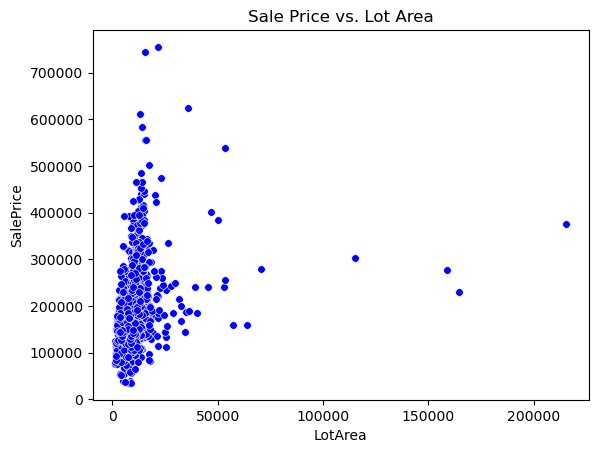

In [101]:
sns.scatterplot(x = training_data['LotArea'], y = training_data['SalePrice'], color = 'blue', s = 30)
plt.title('Sale Price vs. Lot Area')

Text(0.5, 1.0, 'Sale Price vs. Garage Area')

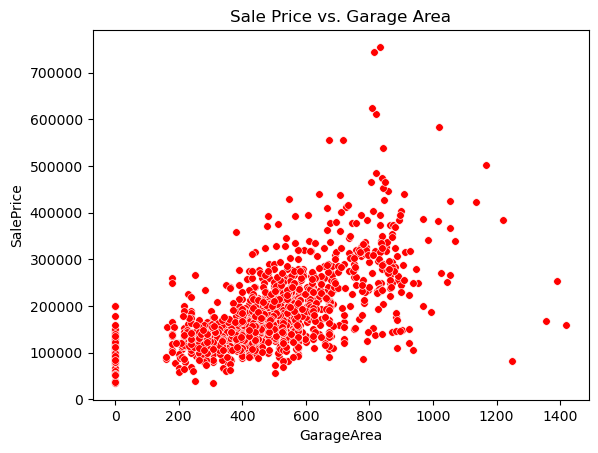

In [102]:
sns.scatterplot(x = training_data['GarageArea'], y = training_data['SalePrice'], color = 'red', s = 30)
plt.title('Sale Price vs. Garage Area')

Text(0.5, 1.0, 'Sale Price vs. GrLivArea')

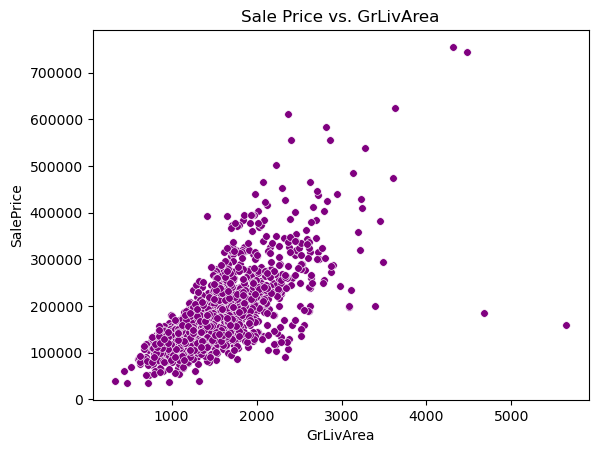

In [103]:
sns.scatterplot(x = training_data['GrLivArea'], y = training_data['SalePrice'], color = 'purple', s = 30)
plt.title('Sale Price vs. GrLivArea')

In [104]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    return data[(data[variable] <= upper) & (data[variable] > lower)]

In [215]:
def ohe_quality(data):
    
    oh_enc = OneHotEncoder()
    oh_enc.fit(data[['OverallQual']])
    ohe_data = oh_enc.transform(data[['OverallQual']]).toarray()
    data_w_ohe = data.join(pd.DataFrame(ohe_data, columns=oh_enc.get_feature_names_out(), index=data.index))

    return data_w_ohe

In [281]:
train = training_data.copy()
test = test_data.copy()

#Fill in missing values

train['OpenPorchSF'] = train['OpenPorchSF'].fillna(train['OpenPorchSF'].median())
test['OpenPorchSF'] = test['OpenPorchSF'].fillna(test['OpenPorchSF'].median())

train['WoodDeckSF'] = train['WoodDeckSF'].fillna(train['WoodDeckSF'].median())
test['WoodDeckSF'] = test['WoodDeckSF'].fillna(test['WoodDeckSF'].median())

train['GarageArea'] = train['GarageArea'].fillna(train['GarageArea'].median())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].median())

train['GarageCars'] = train['GarageCars'].fillna(train['GarageCars'].median())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].median())

train['Fireplaces'] = train['Fireplaces'].fillna(train['Fireplaces'].median())
test['Fireplaces'] = test['Fireplaces'].fillna(test['Fireplaces'].median())

train['TotRmsAbvGrd'] = train['TotRmsAbvGrd'].fillna(train['TotRmsAbvGrd'].median())
test['TotRmsAbvGrd'] = test['TotRmsAbvGrd'].fillna(test['TotRmsAbvGrd'].median())

train['FullBath'] = train['FullBath'].fillna(train['FullBath'].median())
test['FullBath'] = test['FullBath'].fillna(test['FullBath'].median())

train['GrLivArea'] = train['GrLivArea'].fillna(train['GrLivArea'].median())
test['GrLivArea'] = test['GrLivArea'].fillna(test['GrLivArea'].median())

train['1stFlrSF'] = train['1stFlrSF'].fillna(train['1stFlrSF'].median())
test['1stFlrSF'] = test['1stFlrSF'].fillna(test['1stFlrSF'].median())

train['2ndFlrSF'] = train['2ndFlrSF'].fillna(train['2ndFlrSF'].median())
test['2ndFlrSF'] = test['2ndFlrSF'].fillna(test['2ndFlrSF'].median())

train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(train['TotalBsmtSF'].median())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median())

train['BsmtUnfSF'] = train['BsmtUnfSF'].fillna(train['BsmtUnfSF'].median())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median())

train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())

train['LotArea'] = train['LotArea'].fillna(train['LotArea'].median())
test['LotArea'] = test['LotArea'].fillna(test['LotArea'].median())

train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].median())

train['BedroomAbvGr'] = train['BedroomAbvGr'].fillna(train['BedroomAbvGr'].median())
test['BedroomAbvGr'] = test['BedroomAbvGr'].fillna(test['BedroomAbvGr'].median())

train['HalfBath'] = train['HalfBath'].fillna(train['HalfBath'].median())
test['HalfBath'] = test['HalfBath'].fillna(test['HalfBath'].median())

train['BsmtFullBath'] = train['BsmtFullBath'].fillna(train['BsmtFullBath'].median())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].median())

train['BsmtFinSF1'] = train['BsmtFinSF1'].fillna(train['BsmtFinSF1'].median())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median())

#Remove outliers and OHE
train = remove_outliers(train, 'SalePrice')
train = ohe_quality(train)

test = ohe_quality(test)

In [274]:
features = ['OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'FullBath', 'GrLivArea', '1stFlrSF',
            '2ndFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'MasVnrArea', 'LotArea', 'LotFrontage', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd',
            'BedroomAbvGr', 'HalfBath', 'BsmtFullBath', 'BsmtFinSF1', 
            'OverallQual_1', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
            'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10']

In [275]:
X_train, y_train = train[features], train['SalePrice']
X_test = test[features]

In [276]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_transf = scaler.transform(X_test)

In [277]:
#ElasticNet Model

model = ElasticNet(alpha = 0.01)
model.fit(train[features], train['SalePrice'])
predictions = model.predict(X_test)

In [278]:
#Ridge Model

model2 = Ridge(alpha = 0.05)
model2.fit(train[features], train['SalePrice'])
predictions2 = model2.predict(X_test)

In [279]:
#Lasso Model

model3= Lasso(alpha = 0.01)
model3.fit(train[features], train['SalePrice'])
predictions3 = model3.predict(X_test)

In [280]:
output = pd.DataFrame({'Id': test.Id, 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
